##  Installing all the libraries

In [149]:
%load_ext dotenv
%dotenv
!pip3 install prometheus-api-client==0.0.2b1
!pip3 install matplotlib

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [150]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

## Setting up the connection to scrape metrics from the prometheus instance
We need to obtain a session token in order to scrape the required Thanos instance on OpenShift. You can obtain this token value (after having logged in to OpenShift) and setting it as an env variable.

In [151]:
url = os.environ.get("FLT_PROM_URL")
token = os.environ.get("FLT_PROM_ACCESS_TOKEN")

## Collecting the metrics 
Lets create a `PrometheusConnect`object which stores the connection parameters

In [152]:
pc = PrometheusConnect(url=url, headers={"Authorization": "bearer {}".format(token)}, disable_ssl=True)

Fetching a list of all metrics being scraped by the prometheus instance

In [153]:
all_metrics = pc.all_metrics()
all_metrics

/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['alerts',
 'cluster:capacity_cpu_cores:sum',
 'cluster:capacity_memory_bytes:sum',
 'cluster:cpu_usage_cores:sum',
 'cluster:memory_usage_bytes:sum',
 'cluster:node_instance_type_count:sum',
 'cluster_operator_conditions',
 'cluster_operator_up',
 'cluster_version',
 'cluster_version_available_updates',
 'cluster_version_payload',
 'code:apiserver_request_count:rate:sum',
 'etcd_object_counts',
 'instance:etcd_object_counts:sum',
 'kube_pod_status_ready:etcd:sum',
 'kube_pod_status_ready:image_registry:sum',
 'openshift:cpu_usage_cores:sum',
 'openshift:memory_usage_bytes:sum',
 'scrape_duration_seconds',
 'scrape_samples_post_metric_relabeling',
 'scrape_samples_scraped',
 'scrape_series_added',
 'up']

In [147]:
print("Number of metrics present:", len(all_metrics))

Number of metrics present: 23


We can fetch the data for a specific metric name based on a particular time frame, duration size and label configurations

In [158]:
metric_data = pc.get_metric_range_data(metric_name='cluster:capacity_cpu_cores:sum', start_time='2d', chunk_size='1d')

/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certifi

In [159]:
len(metric_data)

8486

Let's look at one of the metrics

In [160]:
print(metric_data[0])
print(type(metric_data[0]))

{'metric': {'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}, 'values': [[1563202898.757, '2'], [1563202958.757, '2'], [1563203018.757, '2'], [1563203078.757, '2'], [1563203138.757, '2'], [1563203198.757, '4'], [1563203258.757, '4'], [1563203318.757, '4'], [1563203378.757, '4'], [1563203438.757, '6'], [1563203498.757, '6'], [1563203558.757, '6'], [1563203618.757, '6'], [1563203678.757, '6'], [1563203738.757, '6'], [1563203798.757, '6'], [1563203858.757, '6'], [1563203918.757, '6'], [1563203978.757, '6'], [1563204038.757, '6'], [1563204098.757, '6'], [1563204158.757, '6'], [1563204218.757, '6'], [1563204278

In [161]:
metric_data[0].keys()

dict_keys(['metric', 'values'])

In [162]:
for metric in metric_data:
    print(metric["metric"], '\n')

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0004111f-a39a-411c-8c63


{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '54761c4e-c85a-41f6-8a76-643b22e15186', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-3', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '54761c4e-c85a-41f6-8a76-643b22e15186', 'endpoint': 'internal', 'job': 'telemeter-server', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-3', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '547c69a4-c02c-40d7-9ec6-39c4e20666db', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_node_role_kubernetes_io': 'master'


{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': 'b490cfa1-a7dd-4917-906a-ce15085f2f44', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-6', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': 'b490cfa1-a7dd-4917-906a-ce15085f2f44', 'endpoint': 'internal', 'job': 'telemeter-server', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-6', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': 'b491aa9f-f587-492c-83ae-2c66ab0e1132', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type':

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '129eb479-df88-4663-8449-4299bb8eb1a8', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-2', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '12a5de3c-e4ba-4a21-b8cb-80733a61be01', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-6', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '12a5de3c-e4ba-4a21-b8cb

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '5a0e536b-bf07-4118-acd5-5b8403cee3d0', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '5a0e536b-bf07-4118-acd5-5b8403cee3d0', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '5a2b115a-1216-4ef2-a74

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



To keep track of multiple metrics each with multiple chunks distributed in a list, we created the Metric and MetricsList classes


### How `MetricsList` works
To combine the chunks for each metric, we can initialize a `MetricsList` object <br>
It creates a list of `Metric` objects, where each object is unique for a specific time-series.

In [163]:
metrics_object_list = MetricsList(metric_data)
print(len(metrics_object_list))
print(type(metrics_object_list[0]))

6716
<class 'prometheus_api_client.metric.Metric'>


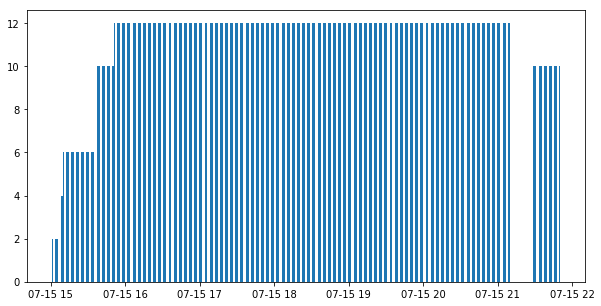

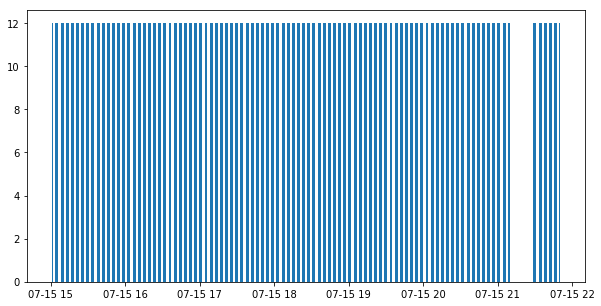

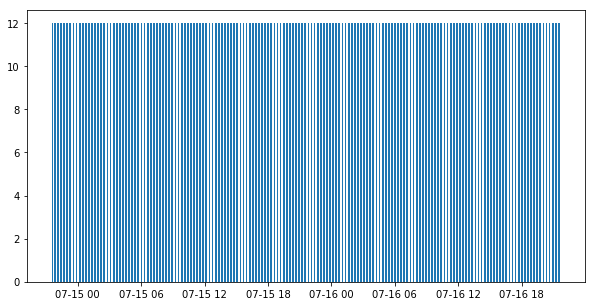

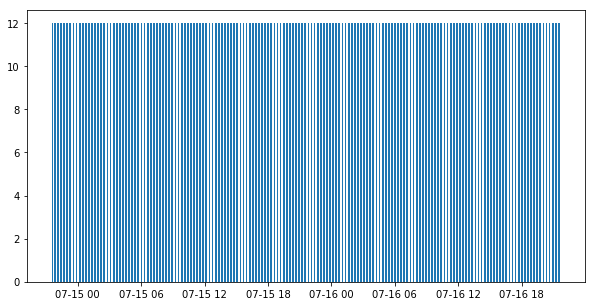

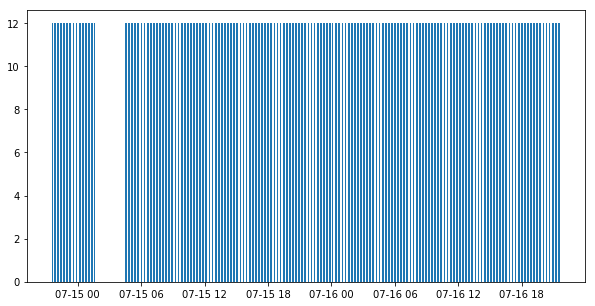

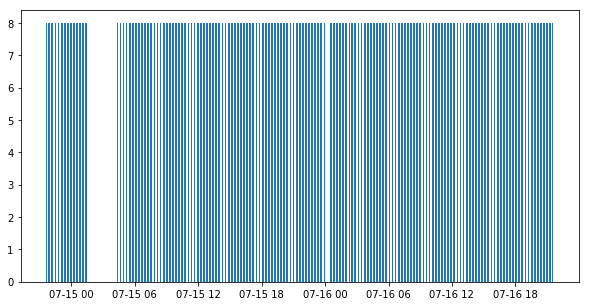

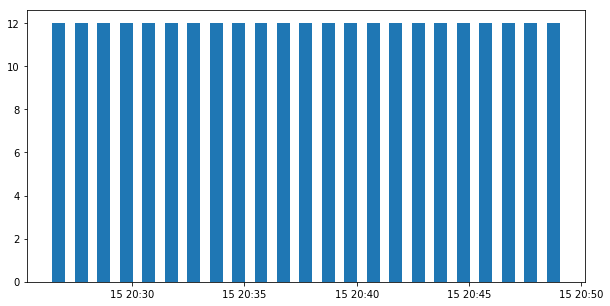

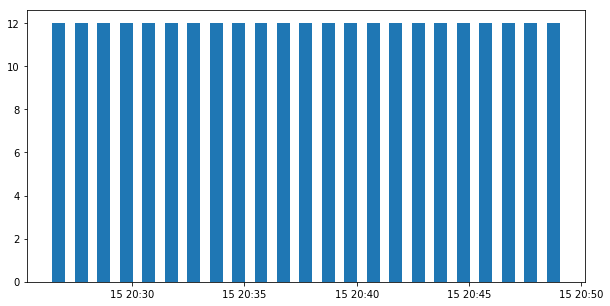

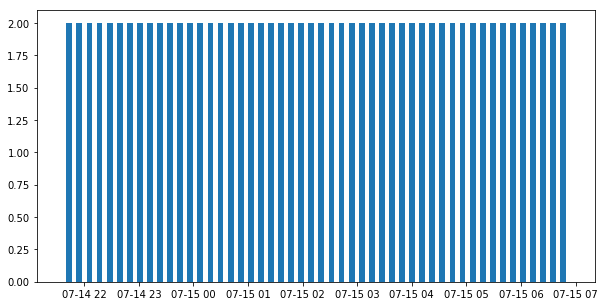

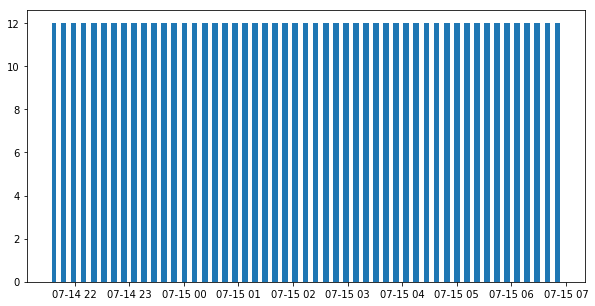

In [221]:
plt.rcParams['figure.figsize'] = [10, 5]
for m in range(10):
    plt.bar(metrics_object_list[m].metric_values.ds, metrics_object_list[m].metric_values.y,width=0.0004,align='center')
    plt.show()

In [165]:
#Obtaining the labels of the metric
for item in metrics_object_list:
    print(item.metric_name, item.label_config)
    print("Number of labels identified:", len(item.label_config), "\n")

cluster:capacity_cpu_cores:sum {'_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '0004


cluster:capacity_cpu_cores:sum {'_id': '27b6fd76-62ae-4381-97f3-a00a239ec8b5', 'endpoint': 'internal', 'job': 'telemeter-server', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-5', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 10 

cluster:capacity_cpu_cores:sum {'_id': '27d59a37-0ab3-43ca-b7b2-ebafd9e313f1', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-2', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '27d59a37-0ab3-43ca-b7b2-ebafd9e313f1', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta

Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '4f51a296-9464-4943-b1e0-230169a4cff1', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '4f69f4d0-15f0-46aa-a7c1-8d5d02fe7251', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-9', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_

Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '73136ec2-5bf8-40f0-8dab-fdf9d0addb24', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-6', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '73136ec2-5bf8-40f0-8dab-fdf9d0addb24', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-6', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:c

cluster:capacity_cpu_cores:sum {'_id': '99ba0fe4-e127-4f62-a3ba-07b0bff3272f', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-0', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '99ba0fe4-e127-4f62-a3ba-07b0bff3272f', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-0', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '99c8

Number of labels identified: 10 

cluster:capacity_cpu_cores:sum {'_id': 'beb5c6e1-b52d-4a4b-b4f9-80b538ac6d8f', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.4xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-0', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': 'beb5c6e1-b52d-4a4b-b4f9-80b538ac6d8f', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-0', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:

Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': 'e793d937-acf6-47d5-a136-08a6878111b9', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-5', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': 'e793d937-acf6-47d5-a136-08a6878111b9', 'endpoint': 'internal', 'job': 'telemeter-server', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-5', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 10 

cluster:capacity_cpu_cores:sum {'_id': 'e8181098-db63-48e6-9114-0fe09c5701fb', 'endpoint': 'internal', 'job': 'telemete

cluster:capacity_cpu_cores:sum {'_id': '16efa35f-f33c-466b-9133-bfab84a6e841', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-2', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '1705c517-7b0a-4c69-8ea0-f63722b575eb', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '170

Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '45c6a26d-20a2-45cb-82e6-3b927a18e72a', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-1', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '45c6a26d-20a2-45cb-82e6-3b927a18e72a', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-1', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:c


cluster:capacity_cpu_cores:sum {'_id': '7030bfa0-5365-4ec9-94b4-aa525c044368', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-5', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '70349793-8c2f-4e4a-a054-3eccfde9d132', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-7', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '70

Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '991c0cb5-f324-41a1-bdd9-4270e2a39429', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-3', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '998736a0-3491-4f15-a6fe-99792547cc66', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-3', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The constructor for MetricsList combined all the chunks for each metric time-series in a single Metric object

-----
## More about the `Metric` class
Let's look at one of the metrics from the `metrics_object_list` to learn more about the `Metric` class

In [166]:
metric_object = metrics_object_list[0]
print(type(metric_object))

<class 'prometheus_api_client.metric.Metric'>


In [167]:
print(metric_object)

{
metric_name: 'cluster:capacity_cpu_cores:sum'
label_config: {'_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
metric_values:                                ds   y
0   2019-07-15 15:01:38.756999969   2
1   2019-07-15 15:02:38.756999969   2
2   2019-07-15 15:03:38.756999969   2
3   2019-07-15 15:04:38.756999969   2
4   2019-07-15 15:05:38.756999969   2
5   2019-07-15 15:06:38.756999969   4
6   2019-07-15 15:07:38.756999969   4
7   2019-07-15 15:08:38.756999969   4
8   2019-07-15 15:09:38.756999969   4
9   2019-07-15 15:10:38.756999969   6
10  2019-07-15 15:11:38.756999969   6
11  2019-07-15 15:12:38.756999969   6
12  2019-07-15 15:13:38.756999969   6


The `Metric` object has 3 properties.

They are,

* `metric_name`: stores the name of the metric as a string

* `label_config`: stores metric labels and values as a dict

* `metric_values`: metric values as a pandas dataframe

In [168]:
metric_object.metric_name

'cluster:capacity_cpu_cores:sum'

In [169]:
metric_object.label_config

{'_id': '0001e802-ecf1-4555-8fce-d83e2299aaba',
 'endpoint': 'internal',
 'job': 'telemeter-server',
 'label_beta_kubernetes_io_instance_type': 'm4.large',
 'monitor': 'prometheus',
 'namespace': 'telemeter-production',
 'pod': 'telemeter-server-8',
 'prometheus': 'openshift-monitoring/k8s',
 'prometheus_replica': 'prometheus-telemeter-0',
 'replica': '$(HOSTNAME)',
 'service': 'telemeter-server'}

In [170]:
metric_object.metric_values

ds   y
0   2019-07-15 15:01:38.756999969   2
1   2019-07-15 15:02:38.756999969   2
2   2019-07-15 15:03:38.756999969   2
3   2019-07-15 15:04:38.756999969   2
4   2019-07-15 15:05:38.756999969   2
5   2019-07-15 15:06:38.756999969   4
6   2019-07-15 15:07:38.756999969   4
7   2019-07-15 15:08:38.756999969   4
8   2019-07-15 15:09:38.756999969   4
9   2019-07-15 15:10:38.756999969   6
10  2019-07-15 15:11:38.756999969   6
11  2019-07-15 15:12:38.756999969   6
12  2019-07-15 15:13:38.756999969   6
13  2019-07-15 15:14:38.756999969   6
14  2019-07-15 15:15:38.756999969   6
15  2019-07-15 15:16:38.756999969   6
16  2019-07-15 15:17:38.756999969   6
17  2019-07-15 15:18:38.756999969   6
18  2019-07-15 15:19:38.756999969   6
19  2019-07-15 15:20:38.756999969   6
20  2019-07-15 15:21:38.756999969   6
21  2019-07-15 15:22:38.756999969   6
22  2019-07-15 15:23:38.756999969   6
23  2019-07-15 15:24:38.756999969   6
24  2019-07-15 15:25:38.756999969   6
25  2019-07-15 15:26:38.756999969   6
26  2019-07-15 15:27:38.756999969   6
27  2019-07-15 15:28:38.756999969   6
28  2019-07-15 15:29:38.756999969   6
29  2019-07-15 15:30:38.756999969   6
..                            ...  ..
362 2019-07-15 21:03:38.756999969  12
363 2019-07-15 21:04:38.756999969  12
364 2019-07-15 21:05:38.756999969  12
365 2019-07-15 21:06:38.756999969  12
366 2019-07-15 21:07:38.756999969  12
367 2019-07-15 21:08:38.756999969  12
368 2019-07-15 21:09:38.756999969  12
369 2019-07-15 21:27:38.756999969  10
370 2019-07-15 21:28:38.756999969  10
371 2019-07-15 21:29:38.756999969  10
372 2019-07-15 21:30:38.756999969  10
373 2019-07-15 21:31:38.756999969  10
374 2019-07-15 21:32:38.756999969  10
375 2019-07-15 21:33:38.756999969  10
376 2019-07-15 21:34:38.756999969  10
377 2019-07-15 21:35:38.756999969  10
378 2019-07-15 21:36:38.756999969  10
379 2019-07-15 21:37:38.756999969  10
380 2019-07-15 21:38:38.756999969  10
381 2019-07-15 21:39:38.756999969  10
382 2019-07-15 21:40:38.756999969  10
383 2019-07-15 21:41:38.756999969  10
384 2019-07-15 21:42:38.756999969  10
385 2019-07-15 21:43:38.756999969  10
386 2019-07-15 21:44:38.756999969  10
387 2019-07-15 21:45:38.756999969  10
388 2019-07-15 21:46:38.756999969  10
389 2019-07-15 21:47:38.756999969  10
390 2019-07-15 21:48:38.756999969  10
391 2019-07-15 21:49:38.756999969  10

[392 rows x 2 columns]

### The `==` operator
What happens when you do `metric_object_1 == metric_object_2`? <br>
The `==` comparison operator checks if `metric_object_1` and `metric_object_2` belong to the same metric time-series.

Let's initialize a `Metric` object for each of the chunks that we downloaded from prometheus in `metric_data`

In [171]:
metric_object_chunk_list = []
for raw_metric in metric_data:
    metric_object_chunk_list.append(Metric(raw_metric))

In [172]:
len(metric_object_chunk_list)

8486

Let's look at the first two metrics from this chunk

In [184]:
print(metric_object_chunk_list[0].metric_name, metric_object_chunk_list[0].label_config)
print("\n-------------------------------------------------------------------------------\n")
print(metric_object_chunk_list[1].metric_name, metric_object_chunk_list[1].label_config)

cluster:capacity_cpu_cores:sum {'_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}

-------------------------------------------------------------------------------

cluster:capacity_cpu_cores:sum {'_id': '0001e802-ecf1-4555-8fce-d83e2299aaba', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-8', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}


Here both objects have the same metric name, but the label_configs have one different value (type), which means they belong to different metric time-series.

Hence, when we compare them metric_object_chunk_list[0]==metric_object_chunk_list[1] it should return false

In [185]:
print(metric_object_chunk_list[1]==metric_object_chunk_list[1])

True


----
### The `+` operator
What happens when you do `metric_object_1 + metric_object_2`?

Two `Metric` objects that belong to the same metric time-series, when added together, return a new `Metric` object with the combined metric_values that are stored in both objects

Lets try this on `metric_object_chunk_list[0]` and `metric_object_chunk_list[4]` because we know they belong to the same metric time-series

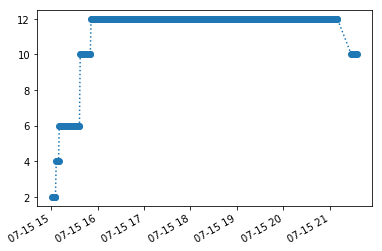

In [186]:
metric_object_chunk_list[0].plot() # plot metric-1

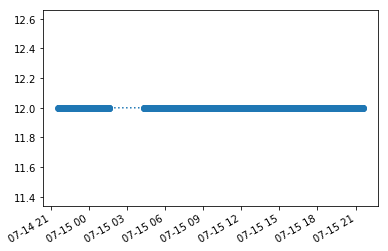

In [187]:
metric_object_chunk_list[4].plot() # plot metric-2

In [188]:
(metric_object_chunk_list[0] + metric_object_chunk_list[4]).plot() # plot metric-1 + metric-2

TypeError: Cannot Add different metric types. Different metric labels

### Plotting
The `Metric` class also has a `plot()`method which lets you plot very simple time-series line graphs

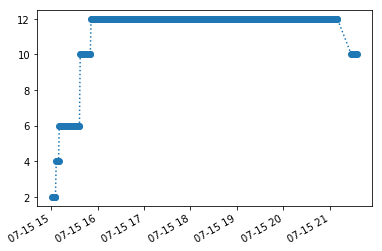

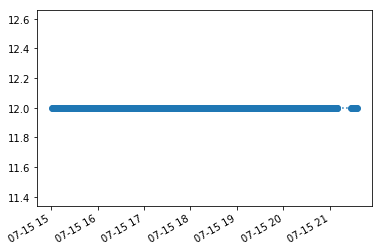

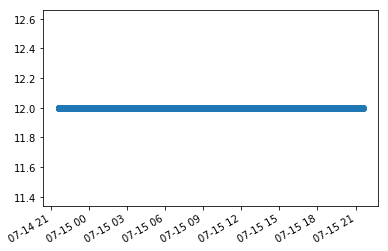

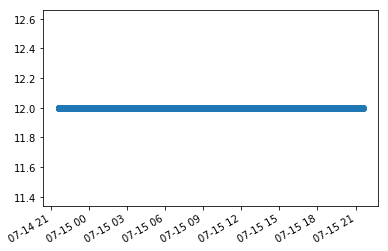

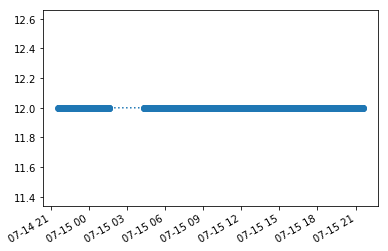

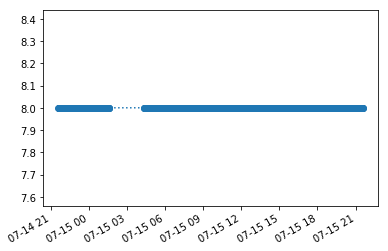

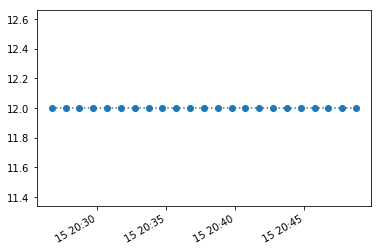

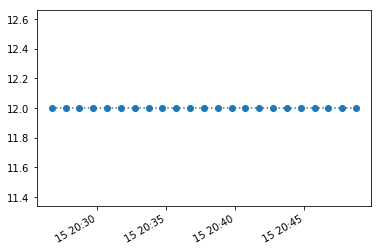

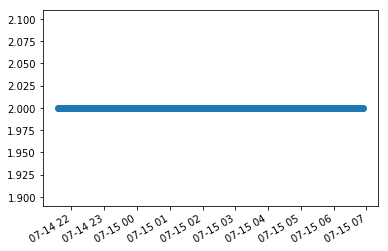

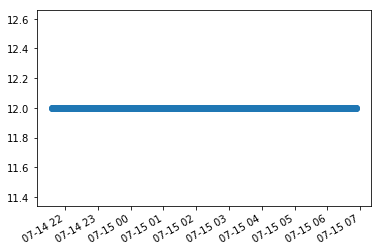

In [189]:
for i in range(10):
    metric_object_chunk_list[i].plot()